In [1]:
from dask_jobqueue import SLURMCluster
cluster = SLURMCluster(cores=1,
                       memory='1GB',
                       account='p31234',
                       queue='short',
                       interface='ib0',
                       scheduler_options={'dashboard_address': ':1321'})

In [9]:
cluster.adapt(minimum_jobs=1,maximum_jobs=10)

In [3]:
from dask.distributed import Client
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://172.41.137.14:1321/status,
Dashboard: http://172.41.137.14:1321/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://172.41.137.14:41933,Workers: 0
Dashboard: http://172.41.137.14:1321/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [15]:
import dask.dataframe as dd
import numpy as np

import os
import re

# get the list of files and directories in the raw data  directory
directory = 'Data/text_files/'
text_files = os.listdir(directory)

data_list = []


# add the data to each sample
for file in text_files:
    data = dd.read_csv(directory+file,delimiter='\t').drop('Unnamed: 6', axis=1)
    data = data[data['freq/Hz']!=0.0]
    data = data.astype({'cycle number': int})
    
    data_list.append(data)
    
    




In [16]:
data_list[0].compute()

,freq/Hz,Re(Z)/Ohm,-Im(Z)/Ohm,cycle number,<Ewe>/V,<I>/mA
35,50001.852000,2.232268,-0.026500,1,0.154198,2.913515
36,39461.480000,2.235793,-0.000947,1,0.154210,2.904369
37,31147.934000,2.239561,0.021806,1,0.154209,2.902246
38,24588.033000,2.241059,0.043260,1,0.154218,2.889971
39,19410.633000,2.243493,0.068882,1,0.154215,2.879764
...,...,...,...,...,...,...
2195,25.766790,7.741849,1.926235,29,2.800782,73.439987
2196,20.331816,7.792013,2.425948,29,2.800789,73.442917
2197,16.053095,7.849138,3.085638,29,2.800785,73.450752
2198,12.668893,7.889944,3.931543,29,2.800763,73.454987


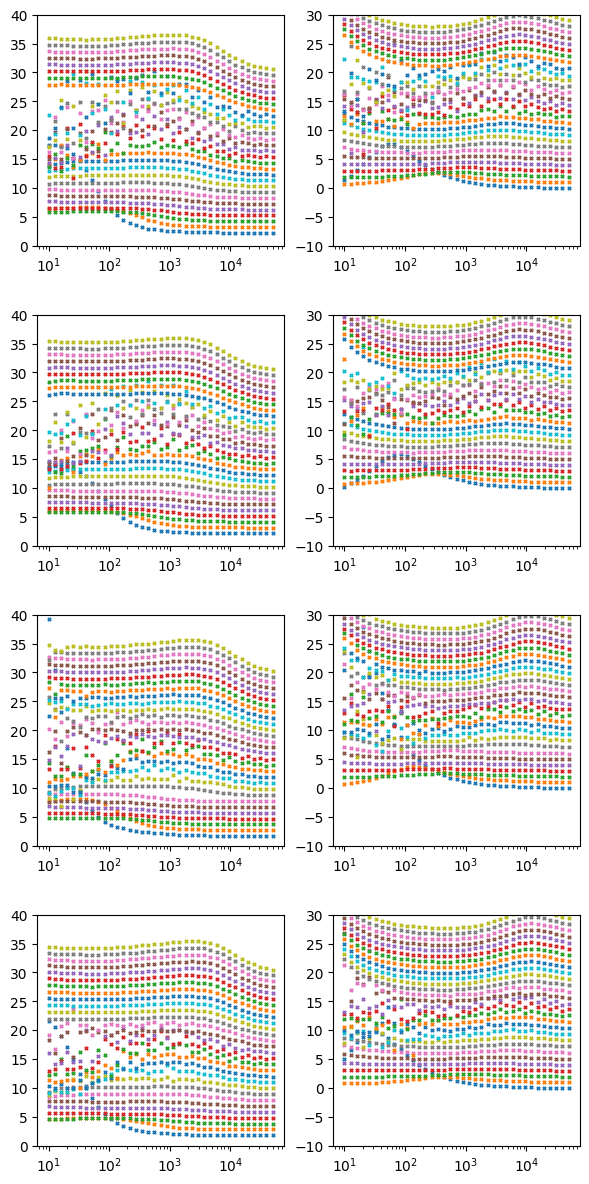

In [36]:
import numpy as np
import matplotlib.pyplot as plt

mm = 0.03937

fig = plt.figure(figsize=(7,12))
subfigs = fig.subfigures(nrows=4,ncols=1)

for row, data in enumerate(data_list):    
    
    subfig = subfigs[row]
    #subfig.suptitle('Sample Serial Number: '+sample_serial_number)
    
    re_ax, im_ax = subfig.subplots(nrows=1, ncols=2)    
    
    re_ax.set_xscale('log')
    im_ax.set_xscale('log')
    
    for cycle in range(data['cycle number'].max().compute()):
        cycle_data = data[data['cycle number'] == cycle+1]
        
        freq = np.array(cycle_data['freq/Hz'])
        ReZ = np.array(cycle_data['Re(Z)/Ohm'])
        ImZ = np.array(cycle_data['-Im(Z)/Ohm'])
        
        re_ax.scatter(freq,ReZ+int(cycle),marker='x',s=5)
        im_ax.scatter(freq,ImZ+int(cycle),marker='x',s=5)
        
        re_ax.set_ylim(0,40)
        im_ax.set_ylim(-10,30)

In [37]:
cluster.close()

2023-07-05 23:55:13,497 - distributed.deploy.adaptive_core - INFO - Adaptive stop
